In [1]:
import pandas as pd

In [2]:
from util.const import ind_chem_tol_exp_cond_d


aledb_key_var_to_nscrpt_design = pd.read_pickle('./data/aledb_key_var_to_nscrpt_design.pkl')
aledb_key_var_to_nscrpt_design['condition'] = aledb_key_var_to_nscrpt_design['ALE experiment'].apply(lambda e: ind_chem_tol_exp_cond_d[e])
display(len(aledb_key_var_to_nscrpt_design), aledb_key_var_to_nscrpt_design.head())

114

,INSCRIPTA_EditType,INSCRIPTA_TargetType,INSCRIPTA_TargetName,INSCRIPTA_CoordinateType,INSCRIPTA_PositionType,INSCRIPTA_PositionValue,INSCRIPTA_SaturationReplacementType,INSCRIPTA_Control,INSCRIPTA_NumberOfCoordinatesToDelete,INSCRIPTA_InsertionSequence,INSCRIPTA_Comment,ALE experiment,effect,source,Inscripta DesignIds,condition
0,Substitution,Specific CDS,purT,Nucleotide,Specific Position,1097,,,,G,,"TOL_2,3-butanediol",nonsynonymous,ALEdb,"{9836015, 9836016, 9836014}",butanediol
1,Substitution,Specific CDS,nanK,Nucleotide,Specific Position,382,,,,T,,"TOL_2,3-butanediol",nonsynonymous,ALEdb,"{9836131, 9836130, 9836132}",butanediol
2,Substitution,Specific CDS,metJ,Nucleotide,Specific Position,16,,,,T,,"TOL_2,3-butanediol",nonsynonymous,ALEdb,"{9836177, 9836178, 9836179}",butanediol
3,Substitution,Specific CDS,metJ,Nucleotide,Specific Position,80,,,,C,,"TOL_2,3-butanediol",nonsynonymous,ALEdb,{9843355},butanediol
4,Substitution,Specific CDS,relA,Nucleotide,Specific Position,116,,,,A,,"TOL_2,3-butanediol",truncation,ALEdb,{9843527},butanediol


In [3]:
ict_ale_var_designs = set()
for _, r in aledb_key_var_to_nscrpt_design.iterrows():
    ict_ale_var_designs |= r['Inscripta DesignIds']
len(ict_ale_var_designs)

166

# Get DCA results

In [4]:
dca_df = pd.read_pickle('./data/dca_df.pkl')
dca_df['DesignId'] = dca_df['DesignId'].apply(lambda s: s.replace('GGY-A007_', ''))

# Don't want to inspect certain conditions
dca_df = dca_df[dca_df['condition'] != 'propanediol']
display(len(dca_df), dca_df.head())

61096

,DesignId,cvDesignEst,cvFit,cv,cvOutlier,baseMean,log2FoldChange,lfcSE,pvalue,padj,...,AA positions,AA ref seq,AA seq change,is_overlap,Grantham score,Grantham category,condition,positive_signif,positive_norm_score,min_max_norm_score
0,9835899,0.0001,0.122469,0.107650,False,142.699254,-0.147376,0.155337,0.324006,0.509286,...,{453},Y,C,True,194.0,radical,adipate,False,0.000000,0.414325
1,9835900,0.0001,0.095786,0.074417,False,457.645318,0.234263,0.102286,0.019719,0.055579,...,{453},Y,C,True,194.0,radical,adipate,False,0.050744,0.461243
2,9835901,0.0001,0.135688,0.116120,False,101.690949,0.064120,0.171874,0.696564,0.824925,...,{453},Y,C,True,194.0,radical,adipate,False,0.013889,0.440326
3,9835902,0.0001,0.090625,0.070824,False,720.246700,-0.192941,0.093270,0.035891,0.092580,...,{265},G,V,False,109.0,moderately radical,adipate,False,0.000000,0.408724
4,9835903,0.0001,0.092204,0.071572,False,614.453744,-0.107648,0.095533,0.252719,0.428408,...,{265},G,V,False,109.0,moderately radical,adipate,False,0.000000,0.419209


In [5]:
import util.util as util

dca_df['predicted variant effect'] = dca_df.apply(util.get_predicted_variant_effect, axis=1)
s = {
    'conservative',
    'moderately conservative',
    'moderately radical',
    'other',
    'radical',
    'truncation'}
assert(s==set(dca_df['predicted variant effect']))

dca_df

,DesignId,cvDesignEst,cvFit,cv,cvOutlier,baseMean,log2FoldChange,lfcSE,pvalue,padj,...,AA ref seq,AA seq change,is_overlap,Grantham score,Grantham category,condition,positive_signif,positive_norm_score,min_max_norm_score,predicted variant effect
0,9835899,0.000100,0.122469,0.107650,False,142.699254,-0.147376,0.155337,0.324006,0.509286,...,Y,C,True,194.0,radical,adipate,False,0.000000,0.414325,radical
1,9835900,0.000100,0.095786,0.074417,False,457.645318,0.234263,0.102286,0.019719,0.055579,...,Y,C,True,194.0,radical,adipate,False,0.050744,0.461243,radical
2,9835901,0.000100,0.135688,0.116120,False,101.690949,0.064120,0.171874,0.696564,0.824925,...,Y,C,True,194.0,radical,adipate,False,0.013889,0.440326,radical
3,9835902,0.000100,0.090625,0.070824,False,720.246700,-0.192941,0.093270,0.035891,0.092580,...,G,V,False,109.0,moderately radical,adipate,False,0.000000,0.408724,moderately radical
4,9835903,0.000100,0.092204,0.071572,False,614.453744,-0.107648,0.095533,0.252719,0.428408,...,G,V,False,109.0,moderately radical,adipate,False,0.000000,0.419209,moderately radical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,9843549,0.761140,0.345267,0.619101,False,343.833904,1.316604,0.730910,0.021175,0.052994,...,D,A,False,126.0,moderately radical,octanoate,False,0.119008,0.356319,moderately radical
7633,9843550,0.014756,0.339352,0.163244,False,888.792600,-0.256665,0.196052,0.180805,0.288027,...,G,C,False,159.0,radical,octanoate,False,0.000000,0.252418,radical
7634,9843551,0.692375,0.344694,0.561020,False,164.732555,0.089952,0.558192,0.851242,0.900847,...,T,N,True,65.0,moderately conservative,octanoate,False,0.008131,0.275309,moderately conservative
7635,9843552,0.000100,0.258046,0.214765,False,11.539293,-0.755889,0.500242,0.089419,0.165169,...,,,False,,,octanoate,False,0.000000,0.219448,truncation


In [6]:
dca_signif_df = dca_df[dca_df.positive_signif].copy()
display(len(dca_signif_df), dca_signif_df.head())

2331

,DesignId,cvDesignEst,cvFit,cv,cvOutlier,baseMean,log2FoldChange,lfcSE,pvalue,padj,...,AA ref seq,AA seq change,is_overlap,Grantham score,Grantham category,condition,positive_signif,positive_norm_score,min_max_norm_score,predicted variant effect
139,9836038,0.091735,0.094020,0.093768,False,524.259562,3.123686,0.139024,7.931700e-113,3.070010e-111,...,L,*,False,,,adipate,True,0.676620,0.816464,truncation
140,9836039,0.000100,0.285202,0.263084,False,16.143294,3.502143,0.639674,8.446580e-09,5.849690e-08,...,L,*,False,,,adipate,True,0.758597,0.862990,truncation
141,9836040,0.000100,0.113396,0.096632,False,191.005096,4.266428,0.226434,8.569800e-80,2.292800e-78,...,L,*,False,,,adipate,True,0.924149,0.956950,truncation
146,9836045,0.063030,0.087670,0.080598,False,1050.435632,3.535497,0.116114,1.251000e-204,2.271170e-202,...,A,V,True,64.0,moderately conservative,adipate,True,0.765822,0.867091,moderately conservative
152,9836053,0.000100,0.086547,0.073237,False,1265.679505,3.717020,0.107563,7.821020e-263,5.963530e-260,...,,,False,,,adipate,True,0.805142,0.889407,truncation


In [7]:
import util.util as util
import util.const as const

var_eff_pal = const.GRANTHAM_CATEGORY_COLOR_PALETTE.copy()
var_eff_pal.update(const.PREDICTED_VARIANT_EFFECT_COLOR_PALETTE)

var_cond_pred_eff_cnt_df = dca_signif_df.groupby(['condition','predicted variant effect']).size().reset_index(name='count')

# Plotting

In [8]:
cond_order = ['adipate','butanediol','diaminobutane','diaminohexane','glutarate','hexanoate',
'isobutyrate', 'octanoate',
# 'propanediol'
]

# For barplot
cnt_d = dict()
for c, cdf in dca_signif_df.groupby('condition'):
    cnt_d[c] = cdf.groupby('variant source').count()['log2FoldChange'].to_dict()
cnt_df = pd.DataFrame(cnt_d).T.fillna(0)
cnt_df.set_axis(cond_order, inplace=True)
cnt_df

,ALEdb,ICT ALE,WT alleleome
adipate,20,26,375
butanediol,23,8,25
diaminobutane,46,12,275
diaminohexane,36,4,155
glutarate,46,32,603
hexanoate,2,4,29
isobutyrate,63,22,310
octanoate,82,10,123


In [9]:
# for using stripplot
cnt_df_2 = pd.DataFrame()
for cond, src_cnt_d in cnt_d.items():
    for src, cnt in src_cnt_d.items():
        srs = pd.Series({'condition': cond, 'variant source': src, 'count': cnt})
        cnt_df_2 = pd.concat([cnt_df_2, pd.DataFrame(srs).T], axis=0)
# cnt_df_2.set_index('')
cnt_df_2

,condition,variant source,count
0,adipate,ALEdb,20
0,adipate,ICT ALE,26
0,adipate,WT alleleome,375
0,butanediol,ALEdb,23
0,butanediol,ICT ALE,8
0,butanediol,WT alleleome,25
0,diaminobutane,ALEdb,46
0,diaminobutane,ICT ALE,12
0,diaminobutane,WT alleleome,275
0,diaminohexane,ALEdb,36


In [10]:
# for plotting barplots if we want them.
var_cond_pred_eff_cnt_df_2 = var_cond_pred_eff_cnt_df.pivot(index='condition', columns='predicted variant effect', values='count')
var_cond_pred_eff_cnt_df_2

predicted variant effect,conservative,moderately conservative,moderately radical,other,radical,truncation
condition,,,,,,
adipate,120,173,60,11,32,25
butanediol,15,17,7,5,5,7
diaminobutane,98,139,56,6,18,16
diaminohexane,65,76,27,6,12,9
glutarate,214,280,94,15,47,31
hexanoate,14,10,4,1,2,4
isobutyrate,128,155,54,10,24,24
octanoate,45,69,48,7,16,30


/tmp/ipykernel_20001/583578145.py:104: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.05, wspace=0.01)


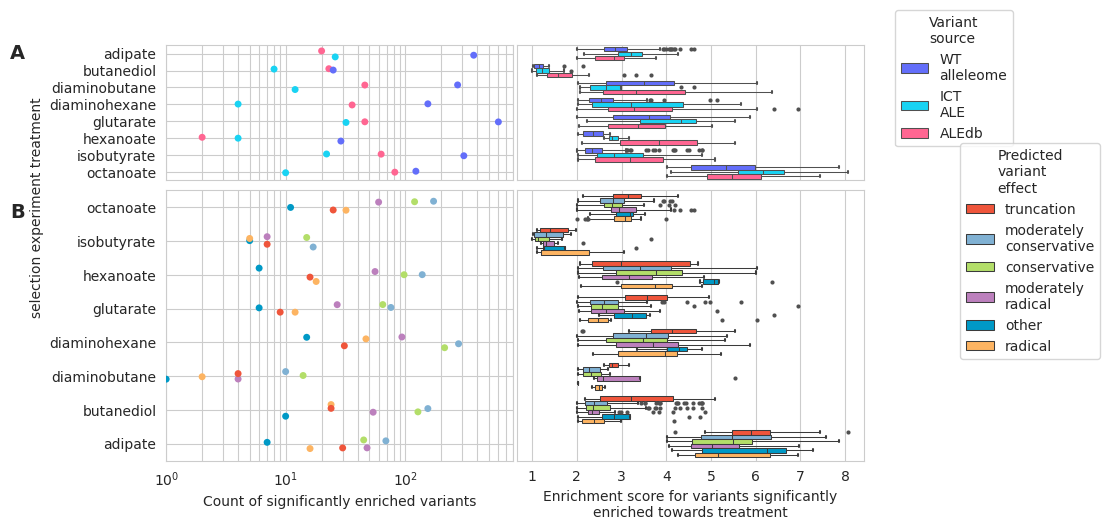

In [11]:
import seaborn as sns
import matplotlib.pyplot as mpl
%matplotlib inline
mpl.rcParams["figure.dpi"] = 100
sns.set_style("whitegrid")


fig, axs = mpl.subplots(
    2,2,
    figsize=(9,5.5),
    layout='constrained',
    gridspec_kw={'height_ratios': [1, 2]},
    sharex='col'
    # sharey='row',
)

src_pal = {
    'ALEdb':'#ff6692',
    'WT alleleome':'#636efa',
    'ICT ALE':'#19D3f3',
}

lw = 0.75

from matplotlib.ticker import LogLocator
import numpy as np


# cnt_df[::-1].plot.barh(ax=axs[0,0], color=pal, width=0.8, edgecolor='none')  # [::-1] So that it matches boxplot
sns.stripplot(
    ax=axs[0,0],
    data=cnt_df_2, y="condition", x="count",
    jitter=0.2,
    hue="variant source",
    palette=src_pal,
)
axs[0,0].set_xscale('log')
axs[0,0].xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1.0, 10.0), numticks=10))
axs[0,0].grid(True, which="both")
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('selection experiment treatment', y=-0.2)
axs[0,0].text(-0.45, 0.9, 'A', transform=axs[0,0].transAxes, weight='bold', fontsize=14)
axs[0,0].set_xlim(1)
# axs[0,0].legend(loc='lower right', bbox_to_anchor=(2.5, 0))
axs[0,0].get_legend().remove()


bp = dict(linewidth=lw)
fp = dict(
    marker='o', markeredgecolor='none',
    markerfacecolor='#505050',  # Same color as boxplot outline
    markersize=3)
mp = dict(linewidth=lw)
wp = dict(linewidth=lw)

# Not dropping duplicates since specific variants
# for different conditions have different enrichment values.
sns.boxplot(ax=axs[0,1], data=dca_signif_df,
            x='log2FoldChange', y='condition', hue='variant source',
            hue_order=['WT alleleome', 'ICT ALE', 'ALEdb'],  # To match order with barplot
            palette = src_pal, saturation=1,
            boxprops = bp, medianprops = mp, flierprops = fp, order = cond_order, whiskerprops = wp)
axs[0,1].set_yticklabels([])
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')
# axs[0,1].get_legend().remove()
legend = axs[0,1].legend(title='Variant\nsource', loc='lower right', bbox_to_anchor=(1.45, 0.2))
for text in legend.get_texts():
    text.set_text(text.get_text().replace(' ', '\n'))


sns.stripplot(
    ax=axs[1,0],
    data=var_cond_pred_eff_cnt_df, y="condition", x="count",
    # dodge=True,
    jitter=0.2,
    hue="predicted variant effect",
    palette=var_eff_pal,
)
# var_cond_pred_eff_cnt_df_2.plot.barh(ax=axs[1,0], color=var_eff_pal, width=0.8, edgecolor='none') 
axs[1,0].set_xscale('log')
axs[1,0].set_ylabel('')
axs[1,0].set_xlabel('Count of significantly enriched variants')
axs[1,0].xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1.0, 10.0), numticks=10))
axs[1,0].grid(True, which="both")
axs[1,0].legend().remove()
axs[1,0].text(-0.45, 0.9, 'B', transform=axs[1,0].transAxes, weight='bold', fontsize=14)
axs[1,0].set_xlim(1)
axs[1,0].set_yticklabels(cond_order[::-1])

sns.boxplot(ax=axs[1,1], data=dca_signif_df,
            x='log2FoldChange', y='condition', hue='predicted variant effect',
            # hue_order=['WT alleleome', 'ICT ALE', 'ALEdb'],  # To match order with barpelot
            palette = var_eff_pal, saturation=1,
            boxprops = bp, medianprops = mp, flierprops = fp, order = cond_order, whiskerprops = wp)
axs[1,1].get_legend().remove()
axs[1,1].set_yticklabels([])
axs[1,1].set_ylabel('')
axs[1,1].set_xlabel('Enrichment score for variants significantly\nenriched towards treatment')
legend = axs[1,1].legend(title='Predicted\nvariant\neffect', loc='lower right', bbox_to_anchor=(1.70, 0.35))
for text in legend.get_texts():
    text.set_text(text.get_text().replace(' ', '\n'))

fig.subplots_adjust(hspace=0.05, wspace=0.01)
# fig.suptitle('Variants from either the ICT ALE or ALEdb\nmostly reached higher enrichment for treatment\nthan WT alleleome variants',x=0.55, y=1.15)

mpl.savefig("f2ab.svg")